In [1]:
import numpy as np
import torch

print("Using torch", torch.__version__)


Using torch 2.0.1+cu118


## Creating a tensor

In [2]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.1530, 0.9670, 0.7077, 0.5289],
         [0.5856, 0.6512, 0.6315, 0.5592],
         [0.8401, 0.4542, 0.1943, 0.2761]],

        [[0.9100, 0.2455, 0.3023, 0.7595],
         [0.9630, 0.1097, 0.2948, 0.1934],
         [0.4792, 0.9405, 0.1910, 0.7336]]])


In [3]:
# Get shape of tensor
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [4]:
x.device

device(type='cpu')

In [5]:
x.dtype

torch.float32

## Reshaping a tensor

In [6]:
W = torch.arange(9) # We can also stack multiple operations in a single line
print("W", W)

W tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [7]:
W = W.view(3, 3) # Reshape to 3x3 matrix
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [8]:
W = torch.arange(9).view(3, 3) # stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


## Indexing a Tensor

In [9]:
print(W[:, 1])   # Second column


tensor([1, 4, 7])


In [10]:
print(W[0])      # First row

tensor([0, 1, 2])


In [11]:
print(W[:2, -1]) # First two rows, last column

tensor([2, 5])


In [12]:
print(W[1:3, :]) # Middle two rows


tensor([[3, 4, 5],
        [6, 7, 8]])


## Tensor Operations

In [13]:
# Adding matrices
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.7642, 0.3057, 0.8450],
        [0.1062, 0.5479, 0.6436]])
X2 tensor([[0.3784, 0.3208, 0.7604],
        [0.5046, 0.7574, 0.2418]])
Y tensor([[1.1426, 0.6266, 1.6055],
        [0.6107, 1.3054, 0.8854]])


In [14]:
# Matrix Multiplication
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)
print("W", W)

h = torch.matmul(x, W)
print("h", h)

X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h tensor([[15, 18, 21],
        [42, 54, 66]])


In [15]:
##

## Training a Neural Network

In [18]:
import torch.optim as opt
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

In [19]:
train_data = torchvision.datasets.GTSRB("/content", split="train", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                               transforms.Resize((224,224))]))
test_data = torchvision.datasets.GTSRB("/content", split="test", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                               transforms.Resize((224,224))]))

100%|██████████| 187490228/187490228 [00:07<00:00, 24046813.46it/s]


Extracting /content/gtsrb/GTSRB-Training_fixed.zip to /content/gtsrb


100%|██████████| 88978620/88978620 [00:04<00:00, 20035592.48it/s]


Extracting /content/gtsrb/GTSRB_Final_Test_Images.zip to /content/gtsrb


100%|██████████| 99620/99620 [00:00<00:00, 301280.05it/s]


Extracting /content/gtsrb/GTSRB_Final_Test_GT.zip to /content/gtsrb


In [20]:
train_data

Dataset GTSRB
    Number of datapoints: 26640
    Root location: /content
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
           )

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


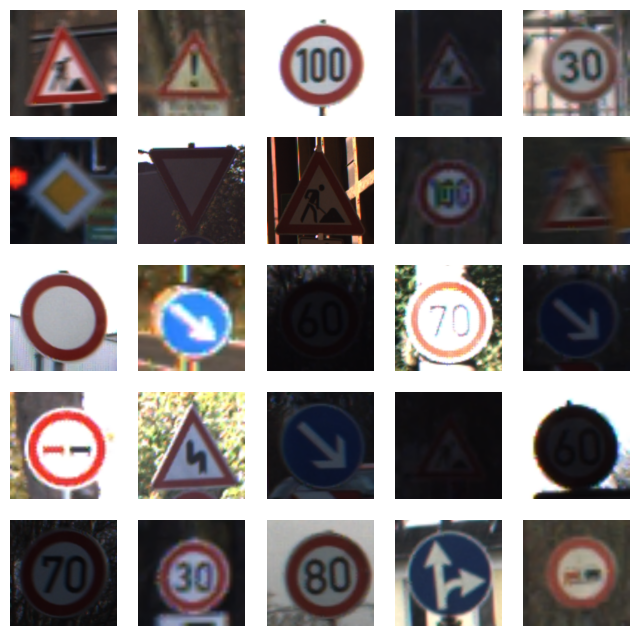

In [21]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.swapaxes(1, 2).swapaxes(0, 2)) # C, H, W -> W, H, C
plt.show()

In [22]:
# Dataloader
train_dl = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

In [23]:
# Model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 117MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
# Replace last layer
model.fc = nn.Linear(model.fc.in_features, 43)

In [25]:
# Set optimizer, loss function, and learning rate
lr = 0.0001
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.SGD(model.parameters(), lr=lr)

In [26]:
# Check GPU
print("GPU Available: ", torch.cuda.is_available())

GPU Available:  True


In [27]:
# Set device for training
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
# Move model to device
model = model.to(device)

In [29]:
# Training
for i in range(0, 10):
    print(f"Epoch {i+1}\n-------------------------------")

    # Training
    for batch, (X, y) in enumerate(train_dl):
        # 1. Transfer data to device
        X = X.to(device)
        y = y.to(device)

        # 2. Get model prediction
        pred = model(X)

        # 3. Calculate Loss
        loss = loss_fn(pred, y)

        # Zero out gradients for new calculation
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Update model parameters
        optimizer.step()

        # Print loss
        if batch % 100 == 0:
            loss = loss.item()
            print(f"Training loss: {loss:>7f}")

    size = len(test_dl.dataset)
    num_batches = len(test_dl)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_dl:
            # 1. Transfer data to device
            X = X.to(device)
            y = y.to(device)

            # 2. Get model prediction
            pred = model(X)

            # 3. Evaluate loss and accuracy
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


Epoch 1
-------------------------------
Training loss: 3.978392
Training loss: 4.036972
Training loss: 3.802551
Training loss: 3.835783
Training loss: 3.829318
Training loss: 3.747416
Training loss: 3.781314
Training loss: 3.617510
Training loss: 3.536058
Test Error: 
 Accuracy: 15.1%, Avg loss: 3.421284 

Epoch 2
-------------------------------
Training loss: 3.469634
Training loss: 3.451842
Training loss: 3.534816
Training loss: 3.236055
Training loss: 3.502297
Training loss: 3.276746
Training loss: 3.248264
Training loss: 2.930178
Training loss: 2.893874
Test Error: 
 Accuracy: 25.8%, Avg loss: 3.088049 

Epoch 3
-------------------------------
Training loss: 3.100003
Training loss: 2.788702
Training loss: 2.981123
Training loss: 3.045147
Training loss: 2.845188
Training loss: 3.002811
Training loss: 2.845412
Training loss: 3.127675
Training loss: 2.844874
Test Error: 
 Accuracy: 34.2%, Avg loss: 2.821782 

Epoch 4
-------------------------------
Training loss: 2.651173
Training los

KeyboardInterrupt: ignored